### <u>**Machine Learning Technologies</u> - Task 1**: Unsupervised Learning
__ITMO University__, St. Petersburg, Russia
- Name    : Rahman, Rasyad Rifatan <br>
- ID      : 458029

---

#### **1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:**

- small decision tree;
- deep decision tree;
- random forest on small trees;
- random forest on deep trees;

Refer to ‘Random_Forrest.ipynb’ and ‘Decision_Trees.ipynb’ notebooks for examples. Split the data to train and test as 75% / 25%.

#### **2. Calculate the following metrics to check the quality of your models:**

- precision;
- recall;
- accuracy;
- F1-score;
- log-loss;

#### **3. Plot precision-recall and ROC curves for your models.**

#### **4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics from p.2 for it.**

Recall for it should be larger than 0.95.

---

### **Data Wrangling**

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss,precision_recall_curve, roc_curve, auc

In [ ]:
df = pd.read_csv('bioresponse.csv')
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df.tail()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0
3750,0,0.133333,0.533952,0.00,0.0,0.347966,0.757971,0.230667,0.272652,0.854116,...,0,0,0,0,0,0,0,0,0,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [110]:
df.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [111]:
df.isnull().sum().sort_values()

Activity    0
D1190       0
D1189       0
D1188       0
D1187       0
           ..
D586        0
D585        0
D584        0
D595        0
D1776       0
Length: 1777, dtype: int64

---

## **Model Training**

---

### **Data Splitting**

In [112]:
# Data
X = df.drop('Activity', axis = 1)
print(X)

            D1        D2    D3   D4        D5        D6        D7        D8  \
0     0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166  0.585445   
1     0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105  0.411754   
2     0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453  0.517720   
3     0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606  0.288764   
4     0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361  0.303809   
...        ...       ...   ...  ...       ...       ...       ...       ...   
3746  0.033300  0.506409  0.10  0.0  0.209887  0.633426  0.297659  0.376124   
3747  0.133333  0.651023  0.15  0.0  0.151154  0.766505  0.170876  0.404546   
3748  0.200000  0.520564  0.00  0.0  0.179949  0.768785  0.177341  0.471179   
3749  0.100000  0.765646  0.00  0.0  0.536954  0.634936  0.342713  0.447162   
3750  0.133333  0.533952  0.00  0.0  0.347966  0.757971  0.230667  0.272652   

            D9       D10  ...  D1767  D1768  D1769 

In [113]:
# Label
y = df['Activity']
print(y)

0       1
1       1
2       1
3       1
4       0
       ..
3746    1
3747    1
3748    0
3749    1
3750    0
Name: Activity, Length: 3751, dtype: int64


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [115]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Decision Tree Model**

In [116]:
dt_small_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_small_tree.fit(X_train, y_train)
dt_small_tree_predict = dt_small_tree.predict(X_test)

dt_deep_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_deep_tree.fit(X_train, y_train)
dt_deep_tree_predict = dt_deep_tree.predict(X_test)

**Random Forest Model**

In [117]:
rf_small_tree = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state=42)
rf_small_tree.fit(X_train, y_train)
rf_small_tree_predict = rf_small_tree.predict(X_test)

rf_deep_tree = RandomForestClassifier(n_estimators = 100, max_depth = 100, random_state=42)
rf_deep_tree.fit(X_train, y_train)
rf_deep_tree_predict = rf_deep_tree.predict(X_test)

---

## **Metric Calculation**

---

In [118]:
model_list = (
    ("Decision Tree - Small", dt_small_tree, dt_small_tree_predict),
    ("Decision Tree - Deep", dt_deep_tree, dt_deep_tree_predict),
    ("Random Forest - Small", rf_small_tree, rf_small_tree_predict),
    ("Random Forest - Deep", rf_deep_tree, rf_deep_tree_predict),
)

for name, model, predicted in model_list:
    y_probs = model.predict_proba(X_test)[:, 1]

    print(f"{name}")
    print(f"Precision\t: {precision_score(y_test, predicted)}")
    print(f"Recall\t\t: {recall_score(y_test, predicted)}")
    print(f"Accuracy\t: {accuracy_score(y_test, predicted)}")
    print(f"F1-Score\t: {f1_score(y_test, predicted)}")
    print(f"Log-Loss\t: {log_loss(y_test,y_probs)}\n")

Decision Tree - Small
Precision	: 0.7853211009174312
Recall		: 0.8
Accuracy	: 0.7611940298507462
F1-Score	: 0.7925925925925926
Log-Loss	: 0.5401985811560338

Decision Tree - Deep
Precision	: 0.7783783783783784
Recall		: 0.8074766355140187
Accuracy	: 0.7590618336886994
F1-Score	: 0.7926605504587156
Log-Loss	: 0.744792838600532

Random Forest - Small
Precision	: 0.794921875
Recall		: 0.7607476635514019
Accuracy	: 0.7515991471215352
F1-Score	: 0.7774594078319007
Log-Loss	: 0.5504245799704968

Random Forest - Deep
Precision	: 0.8253358925143954
Recall		: 0.8037383177570093
Accuracy	: 0.7910447761194029
F1-Score	: 0.8143939393939393
Log-Loss	: 0.4629219425516068



---

## **Precision-Recall Curve and ROC Curves**

---

Precision-Recall Curve

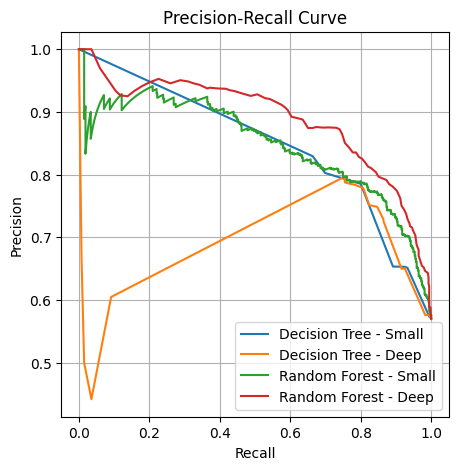

In [119]:
plt.figure(figsize=(5,5))

for name, model, predicted in model_list:
    y_probs = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
    plt.plot(recall, precision, label=f'{name}')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

ROC Curve

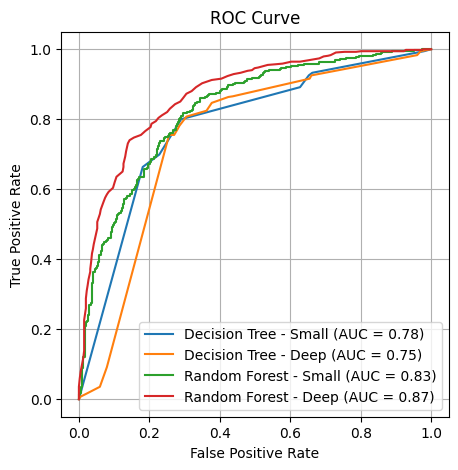

In [120]:
plt.figure(figsize=(5,5))

for name, model, predicted in model_list:
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

---

## **Classifier that Avoids Type II Errors**

---

To achieve a classifier that tends to avoid Type II Errors, the **Random Forest Classifier** is chosen. The reason why it was chosen, was because of its tendency to provide more accurate results than Decision Tree, making it more robust as it also tends to avoid overfitting.

In order to achieve a **Recall** value of over 0.95, the threshold is set lower than its default value of 0.5. This means that more instances would be classified as 1, as the threshold is lowered. Doing this, does increase its **Recall** value, thus reducing the amount of **False Negatives**. In doing so however, we are sacrificing our **Precision** value, as it would also increase our **False Positives**. This would also result in a higher **Log Loss**, as the overall quality of the model is decreased.

In [123]:
rf_deep_tree_new = RandomForestClassifier(n_estimators = 250, max_depth = 100, random_state=42, class_weight='balanced')
rf_deep_tree_new.fit(X_train, y_train)

y_prob = rf_deep_tree_new.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred = (y_probs >= threshold).astype(int)

print(f"Random Forest Classifier")
print(f"Precision\t: {precision_score(y_test, y_pred)}")
print(f"Recall\t\t: {recall_score(y_test, y_pred)}")
print(f"Accuracy\t: {accuracy_score(y_test, y_pred)}")
print(f"F1-Score\t: {f1_score(y_test, y_pred)}")
print(f"Log-Loss\t: {log_loss(y_test,y_pred)}")

Random Forest Classifier
Precision	: 0.694708276797829
Recall		: 0.9570093457943926
Accuracy	: 0.7356076759061834
F1-Score	: 0.8050314465408805
Log-Loss	: 9.529665288380654
